### Pockemon Recognization use of Pre Trained Model VGG16

#### Load Keras librery 

In [1]:
from keras.applications import vgg19

Using TensorFlow backend.


### Load pretrained weigh to imagenet

#### Include_top=False ,use one concept of train the model only input layer not prediction layer 

In [2]:
model=vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

### Show the pretrained layers

In [3]:
model.layers

### Show the only input layer

In [4]:
model.layers[0].input

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

### show the class name of layer

In [5]:
model.layers[0].__class__.__name__

'InputLayer'

### Freze layer because model allready tarined use transfer learning concept traine only input layer

In [6]:
# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in model.layers:
    layer.trainable = False

#### Apply the transfer learning

In [7]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

### Let's add our FC Head back onto VGG

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

### Target class or num of class to train or predict

In [9]:
num_class=3

### Call the user define function and apply the Flattening and Dense layer

In [10]:
FC_Head = addTopModel(model, num_class)
modelnew = Model(inputs=model.input, outputs=FC_Head)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Load Pockemon Datset

### Load Image Librery

In [11]:
from keras.preprocessing.image import ImageDataGenerator

### Load train and Test dataset

In [12]:
train_data = 'pockemon_dataset/train/'
test_data= 'pockemon_dataset/test/'

### Augmented data generation 

### Train Data Generation Technique 

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Test Data Generator

In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10

### Train Generate data

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 346 images belonging to 3 classes.


### Test Generated Data

In [17]:
validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=(224,224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 74 images belonging to 3 classes.


### Optimizers 

In [18]:
from keras.optimizers import RMSprop

#### Save the trained model for future

#### Compile and Fit The model

In [19]:



# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples =346
nb_validation_samples = 74
epochs = 5
#batch_size = 16

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples)

modelnew.save("pockemon.h5")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
  4/346 [..............................] - ETA: 39:53 - loss: 3.2785 - acc: 0.6719

/home/data_science/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


346/346 [==============================] - 1712s 5s/step - loss: 3.6598 - acc: 0.7715 - val_loss: 9.9857 - val_acc: 0.3805
Epoch 2/5
346/346 [==============================] - 1689s 5s/step - loss: 3.7116 - acc: 0.7697 - val_loss: 9.9857 - val_acc: 0.3805
Epoch 3/5
346/346 [==============================] - 1691s 5s/step - loss: 3.6621 - acc: 0.7728 - val_loss: 9.6333 - val_acc: 0.4023
Epoch 4/5
346/346 [==============================] - 1695s 5s/step - loss: 3.6859 - acc: 0.7713 - val_loss: 9.5997 - val_acc: 0.4044
Epoch 5/5
346/346 [==============================] - 1692s 5s/step - loss: 3.6918 - acc: 0.7710 - val_loss: 9.9857 - val_acc: 0.3805


In [20]:
from keras.models import load_model

classifier = load_model('pockemon.h5')

### Test the Prediction

In [21]:
from keras.preprocessing import image
img = image.load_img('pockemon_dataset/pockemon3.jpg', target_size=(224,224))
import numpy as np
image=np.expand_dims(img,axis=0)
classifier.predict(image)

array([[0., 0., 1.]], dtype=float32)

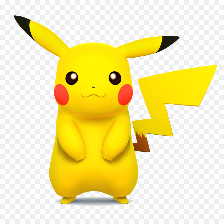

In [22]:
img

In [23]:
from keras.preprocessing import image
img1 = image.load_img('pockemon_dataset/pockemon2.jpg', target_size=(224,224))
import numpy as np
image=np.expand_dims(img1,axis=0)
classifier.predict(image)

array([[0., 0., 1.]], dtype=float32)

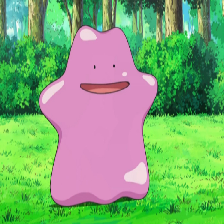

In [60]:
img1

In [24]:
from keras.preprocessing import image
img2 = image.load_img('pockemon_dataset/pockemon.jpg', target_size=(224,224))
import numpy as np
image=np.expand_dims(img2,axis=0)
classifier.predict(image)

array([[0., 0., 1.]], dtype=float32)

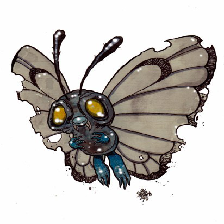

In [62]:
img2

In [32]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[2]": "Butterfree",
                      "[1]": "Ditto",
                      "[0]": "Phikachu"
                      }

monkey_breeds_dict_n = { "Butterfree": "butterfree",
                         "Ditto": "ditto",
                         "Pikachu": "phikachu " 
                     
                      }

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,5):
    input_im = getRandomImage("pockemon_dataset/test/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - ditto
Class - phikachu 
Class - butterfree
Class - phikachu 
Class - phikachu 
